In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np

In [8]:
df=pd.read_csv("/content/Iris_Process.csv")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_1=scaler.fit_transform(df)
df_2=pd.DataFrame(df_1,columns=df.columns)
df_2

,sepal length,sepal width,petal length,petal width,class
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0
146,0.555556,0.208333,0.677966,0.750000,1.0
147,0.611111,0.416667,0.711864,0.791667,1.0
148,0.527778,0.583333,0.745763,0.916667,1.0


In [10]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import datasets

In [11]:
Start=time.time()
agg = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward').fit(df_2)
agglb=agg.fit(df_2)
y_agg=agglb.fit_predict(df_2)
End=time.time()
print(agglb)
print("分群所花費時間:\n",End-Start)

AgglomerativeClustering(n_clusters=3)
分群所花費時間:
 0.035337209701538086


In [12]:
len(y_agg)

150

In [13]:
agg_add = df_2
agg_add["Cluster"] = y_agg
agg_add

,sepal length,sepal width,petal length,petal width,class,Cluster
0,0.222222,0.625000,0.067797,0.041667,0.0,1
1,0.166667,0.416667,0.067797,0.041667,0.0,1
2,0.111111,0.500000,0.050847,0.041667,0.0,1
3,0.083333,0.458333,0.084746,0.041667,0.0,1
4,0.194444,0.666667,0.067797,0.041667,0.0,1
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,1.0,0
146,0.555556,0.208333,0.677966,0.750000,1.0,0
147,0.611111,0.416667,0.711864,0.791667,1.0,0
148,0.527778,0.583333,0.745763,0.916667,1.0,0


In [14]:
agg_results = agg_add.groupby("Cluster").sum()
agg_results

,sepal length,sepal width,petal length,petal width,class
Cluster,,,,,
0,31.777778,20.291667,38.576271,40.125000,50.0
1,9.805556,29.541667,3.932203,3.000000,0.0
2,22.722222,16.041667,27.627119,25.541667,25.0


In [15]:
purityList=[]
total=0
for i in range(3):
    purity = agg_results.loc[i].max()/agg_results.loc[i].sum()
    purityList.append(purity)
    total = total + agg_results.loc[i].sum()

print("純度:\n",purityList)
print("總和:\n",total)

純度:
 [0.27659347270657914, 0.6383326127317583, 0.2362651742395265]
總和:
 343.9828154425612


In [16]:
Total_purity=0
for i in range(len(purityList)):
    Total_purity = Total_purity+purityList[i]*(agg_results.loc[i].sum()/total)
print("總純度:\n",Total_purity)

總純度:
 0.3115527302515194


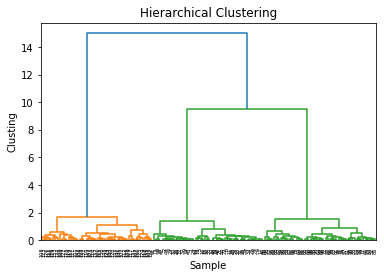

In [17]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df_2, method  = "ward"))
plt.title('Hierarchical Clustering')
plt.xlabel('Sample')
plt.ylabel('Clusting')
plt.show()

In [18]:
print("分群所花費時間:\n",End-Start)
print("總純度:\n",Total_purity)

分群所花費時間:
 0.035337209701538086
總純度:
 0.3115527302515194
